***Lets Grow More***

**2)Intermediate level task:
 Sub task 02)**

**Title:** Create the Decision Tree classifier and visualize it graphically. 


**Introducion:**

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

-At the beginning, the whole training set is considered as the root.

-Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.

-Records are distributed recursively on the basis of attribute values.

-Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

In [1]:
#Importing the required libraries
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier algorithm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree  

sns.set_style('darkgrid')

In [2]:
## Loading dataset

data=pd.read_csv('Iris.csv')

In [3]:
## making a copy of dataset for further use
dataset=data.copy()

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 6)

In [6]:
## count the species present in species column

data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

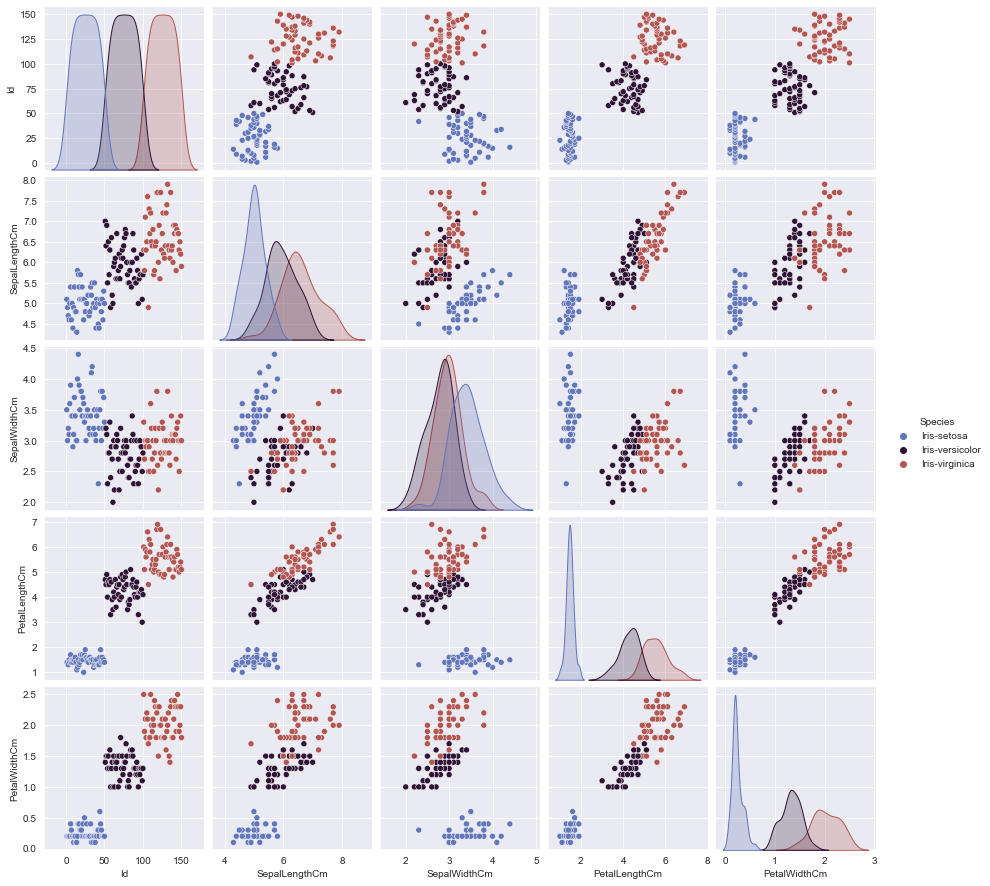

In [8]:
sns.pairplot(data, hue='Species', palette='twilight')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


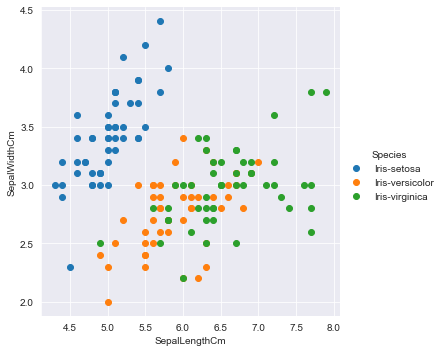

In [9]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


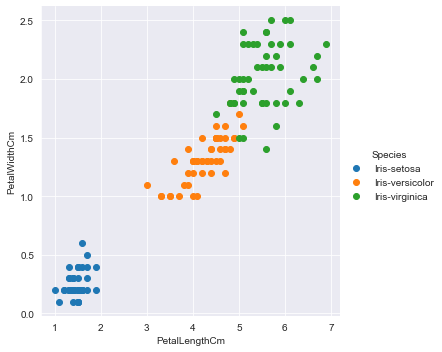

In [10]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

In [11]:
## checking the null values 
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

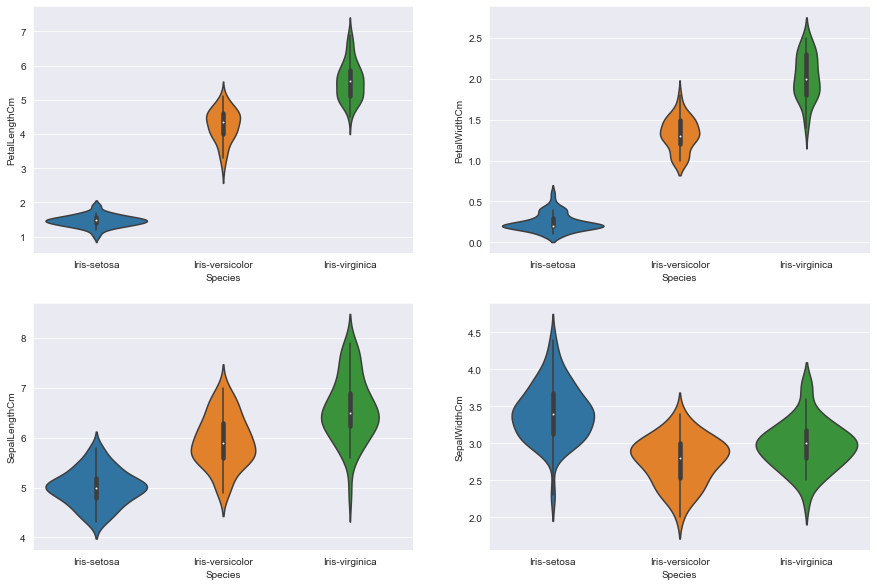

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

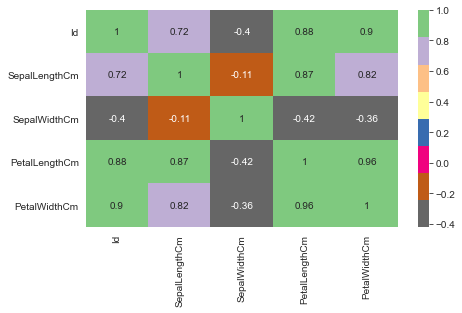

In [15]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='Accent_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [16]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [17]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

**Decision Tree algorithm terminology**

In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-

1)Root Node
It represents the entire population or sample. This further gets divided into two or more homogeneous sets.
Splitting
It is a process of dividing a node into two or more sub-nodes.

2)Decision Node
When a sub-node splits into further sub-nodes, then it is called a decision node.

3)Leaf/Terminal Node
Nodes that do not split are called Leaf or Terminal nodes.

4)Pruning
When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.

5)Branch/Sub-Tree
A sub-section of an entire tree is called a branch or sub-tree.

6)Parent and Child Node
A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.

In [18]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.8888888888888888


In [19]:
petal=data[['PetalLengthCm','PetalWidthCm','Species']]
sepal=data[['SepalLengthCm','SepalWidthCm','Species']]

In [20]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species


In [21]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))


The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


Changing Species Name to Numbers

In [22]:
dataset = dataset.replace(to_replace ="Iris-setosa",          value ="0") 
dataset = dataset.replace(to_replace ="Iris-versicolor",      value ="1") 
dataset = dataset.replace(to_replace ="Iris-virginica",       value ="2") 

Splitting Input and Targets

In [23]:
X = np.array(dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
Y = np.array(dataset["Species"])

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)  

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

In [25]:
gini = DecisionTreeClassifier(criterion = "gini",                # Criterion
                                  max_depth = 5,                     # Max Height of Tree
                                  min_samples_leaf = 3,              # Maximum Leaf samples
                                  random_state = 100)


In [26]:
gini.fit(X_train, Y_train)                                       # Tra

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

Entropy
Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

In [27]:
entropy = DecisionTreeClassifier(criterion = "entropy",          # Criterion
                                     max_depth = 5,                  # Max Height of Tree
                                     min_samples_leaf = 3,           # Max Leaf samples
                                     random_state = 100)

In [28]:
entropy.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [29]:
y_pred_gini = gini.predict(X_test)

In [30]:
# Evaulating predictions with test labels
print ("Accuracy : ", accuracy_score(Y_test,y_pred_gini)*100)         
print ("Report : ",  classification_report(Y_test, y_pred_gini))

Accuracy :  96.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [31]:
 # Performing Prediction on test input
y_pred_entropy = entropy.predict(X_test)                               

In [32]:
 # Evaulating predictions with test labels
print ("Accuracy : ", accuracy_score(Y_test,y_pred_entropy)*100)           
print ("Report : ",  classification_report(Y_test, y_pred_entropy))

Accuracy :  96.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



**Visualizing the decision tree**


[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(209.25, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

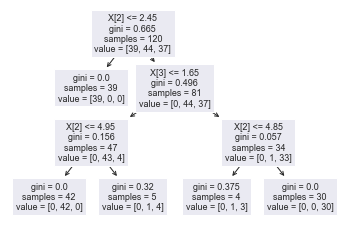

In [33]:
tree.plot_tree(gini)

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.42\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

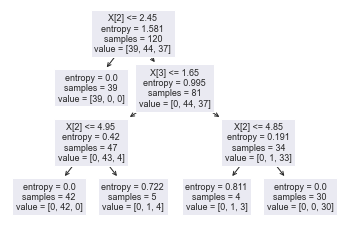

In [34]:
tree.plot_tree(entropy)

Observations:
Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.